## Import libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

    
from datetime import datetime
from numpy import quantile, where, random
from sklearn.neighbors import LocalOutlierFactor

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


## Dataset Description

The dataset contains count of public bikes rented at each hour in Seoul Bike haring System with the corresponding Weather data and Holidays information. 

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. 
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Data Source :http://data.seoul.go.kr/ 
SOUTH KOREA PUBLIC HOLIDAYS. 
URL: publicholidays.go.kr
https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand#


#### Attribute Information:

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour 

Hour - Hour of the day 

Temperature-Temperature in Celsius 

Humidity - % 

Windspeed - m/s 

Visibility - 10m 

Dew point temperature - Celsius 

Solar radiation - MJ/m2 

Rainfall - mm 

Snowfall - cm 

Seasons - Winter, Spring, Summer, Autumn 

Holiday - Holiday/No holiday 

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


## Import dataset

In [2]:
df = pd.read_csv('SeoulBikeData.csv', encoding='latin1')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

As we can see, It has 14 attributes. There are 8760 rows data and mostly the attributes have float64 as data types.

In [3]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


## Data Preparation

Before using the dataset for outlier detection, we will do the data preparation steps such as changing the data type to the proper ones. 
Moreover, we will be trying to do label encoding on the last three attributes (Seasons, Holiday and Functioning Day) in order to obtain numerical values.

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [5]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [6]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [7]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

### Label Encoding

Since the last three attributes are objects/strings as the data type, we will convert them to the numerical ones. Label encoding is similar to one hot encoding. 

In [8]:
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col].fillna("None", inplace=True)
        le.fit(list(df[col].astype(str).values))
        df[col] = le.transform(list(df[col].astype(str).values))
    else:
        df[col].fillna(-999, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   int64         
 12  Holida

### Renaming the attributes' labels

We will rename some labels of attributes in order to make it easier to be executed.

In [10]:
df.rename(columns = {'Rented Bike Count':'Rented_bike_count'}, inplace = True)
df.rename(columns = {'Humidity(%)':'Humidity'}, inplace = True)
df.rename(columns = {'Temperature(°C)':'Temperature'}, inplace = True)
df.rename(columns = {'Visibility (10m)':'Visibility'}, inplace = True)
df.rename(columns = {'Dew point temperature(°C)':'Dew_point_temperature'}, inplace = True)
df.rename(columns = {'Solar Radiation (MJ/m2)':'Solar_radiation'}, inplace = True)
df.rename(columns = {'Wind speed (m/s)':'Wind_speed'}, inplace = True)
df.rename(columns = {'Rainfall(mm)':'Rainfall'}, inplace = True)
df.rename(columns = {'Snowfall (cm)':'Snowfall'}, inplace = True)
df.rename(columns = {'Functioning Day':'Functioning_day'}, inplace = True)

In [11]:
df.tail(3)

,Date,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,0,1,1


### Checking the missing values

In [12]:
df.isna().sum()

Date                     0
Rented_bike_count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_day          0
dtype: int64

There is no missing values, we can continue to find the outliers.

## IQR Method

### Rented Bike Count 

In [13]:
# IQR method (1.5)
Q1 = df['Rented_bike_count'].quantile(0.25)
Q3 = df['Rented_bike_count'].quantile(0.75)


IQR = Q3 - Q1
min_rbc = Q1 - 1.5 * IQR
max_rbc = Q3 + 1.5 * IQR

print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',min_rbc)
print('\nMax:\n',max_rbc)

Q1:
 191.0

Q3:
 1065.25

IQR:
 874.25

Min:
 -1120.375

Max:
 2376.625


In [14]:
# IQR method (3)
Q1 = df['Rented_bike_count'].quantile(0.25)
Q3 = df['Rented_bike_count'].quantile(0.75)


IQR = Q3 - Q1
min_rbc = Q1 - 3 * IQR
max_rbc = Q3 + 3 * IQR

print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',min_rbc)
print('\nMax:\n',max_rbc)

Q1:
 191.0

Q3:
 1065.25

IQR:
 874.25

Min:
 -2431.75

Max:
 3688.0


### Temperature (°C)

In [15]:
#IQR method (1.5)
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)


IQR = Q3 - Q1
min_temp = Q1 - 1.5 * IQR
max_temp = Q3 + 1.5 * IQR

print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',min_temp)
print('\nMax:\n',max_temp)

Q1:
 3.5

Q3:
 22.5

IQR:
 19.0

Min:
 -25.0

Max:
 51.0


In [16]:
# IQR method (3)
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)


IQR = Q3 - Q1
min_temp = Q1 - 3 * IQR
max_temp = Q3 + 3 * IQR

print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',min_temp)
print('\nMax:\n',max_temp)

Q1:
 3.5

Q3:
 22.5

IQR:
 19.0

Min:
 -53.5

Max:
 79.5


### Hour

In [17]:
# IQR method (1.5)
Q1 = df['Hour'].quantile(0.25)
Q3 = df['Hour'].quantile(0.75)

IQR = Q3 - Q1
min_hour = Q1 - 1.5 * IQR
max_hour = Q3 + 1.5 * IQR

print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',min_hour)
print('\nMax:\n',max_hour)

Q1:
 5.75

Q3:
 17.25

IQR:
 11.5

Min:
 -11.5

Max:
 34.5


In [18]:
# IQR method (3)
Q1 = df['Hour'].quantile(0.25)
Q3 = df['Hour'].quantile(0.75)


IQR = Q3 - Q1
min_hour = Q1 - 3 * IQR
max_hour = Q3 + 3 * IQR

print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',min_hour)
print('\nMax:\n',max_hour)

Q1:
 5.75

Q3:
 17.25

IQR:
 11.5

Min:
 -28.75

Max:
 51.75


As for IQR method, it gives us the information based on percentile. Here, we use 1.5 and 3 to set the upper bound and lower bound. However, using 1.5 is more effective, because a bigger scale would make the outliers to be considered as data points while a smaller one would make some of the data points to be perceived as outliers. Moreover, since we cannot see the distribution of the dataset, we can use boxplot to show the visualization.

## Boxplot

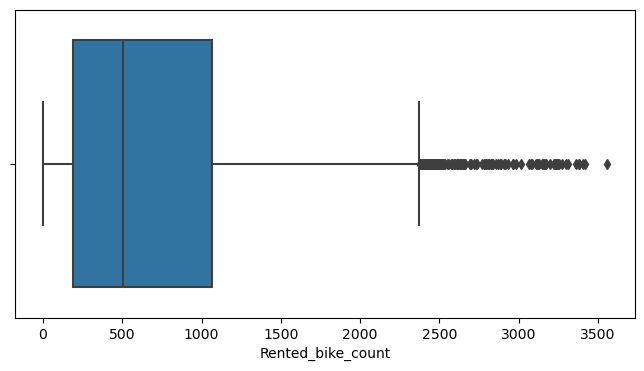

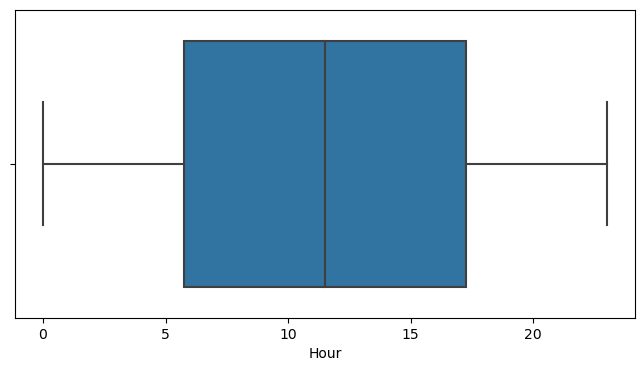

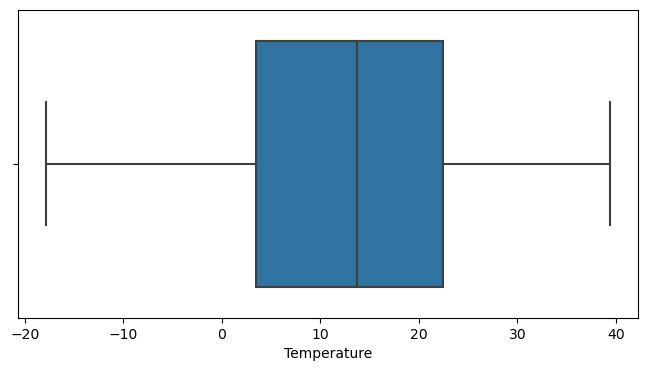

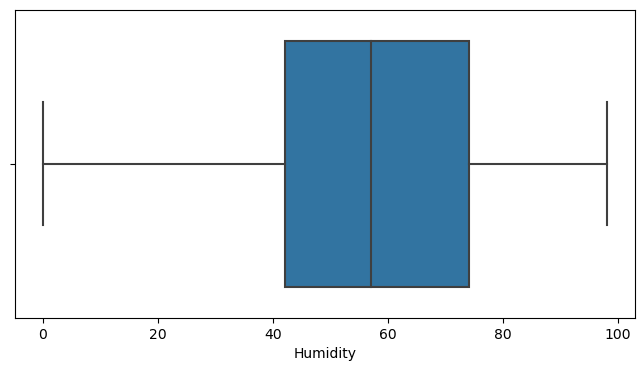

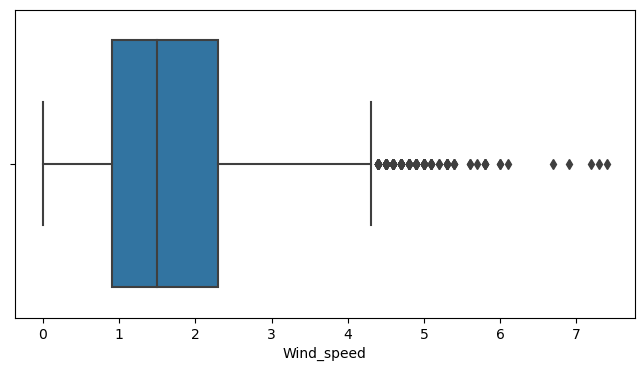

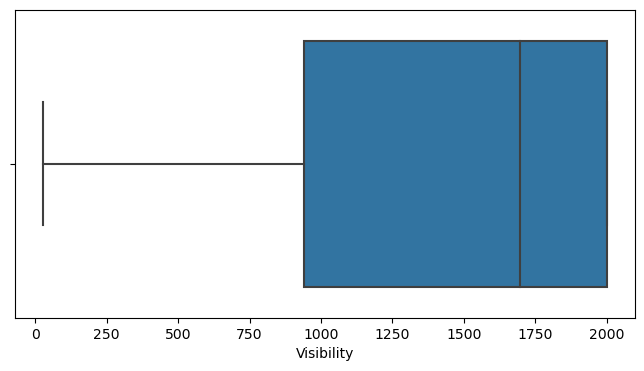

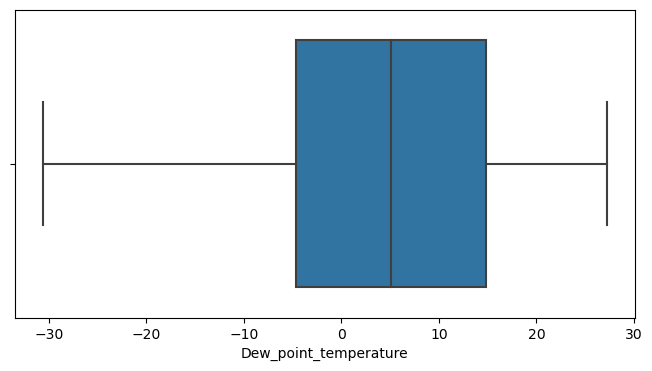

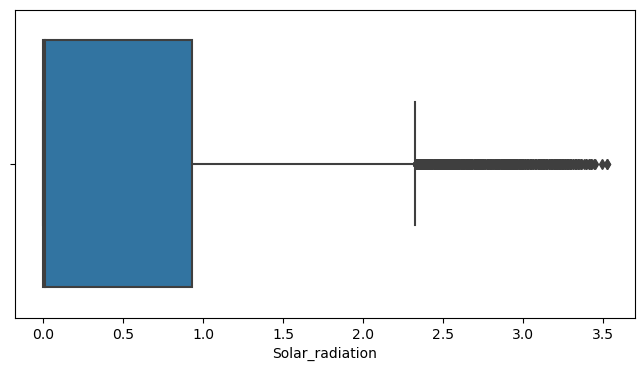

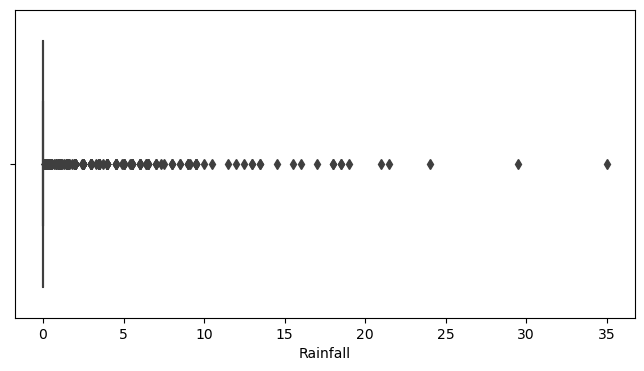

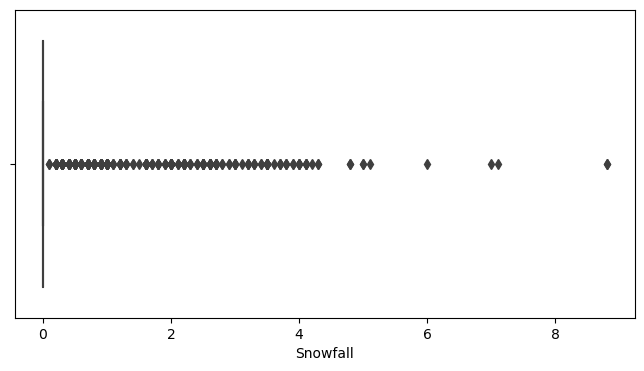

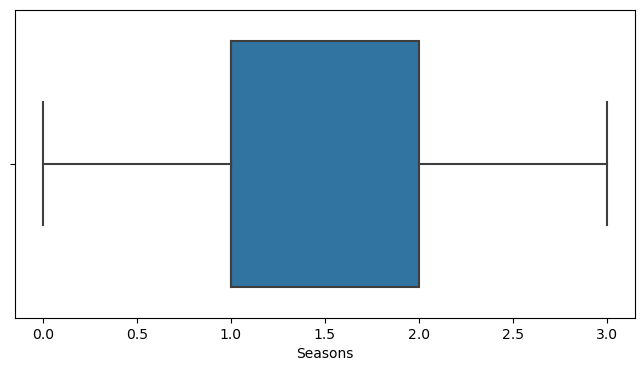

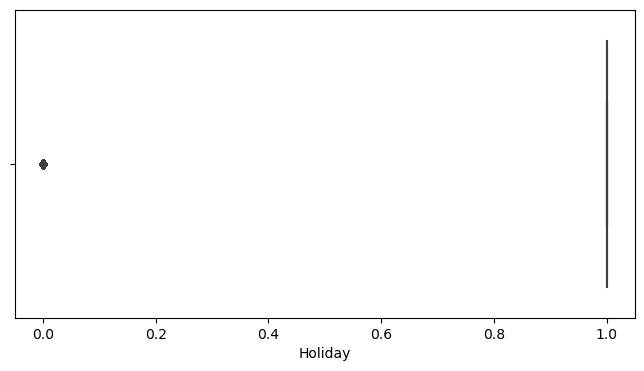

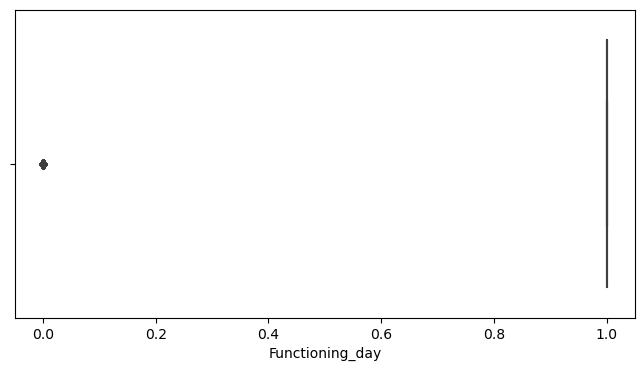

In [19]:
df=df.select_dtypes(exclude=['datetime64[ns]'])

for column in df:
        plt.figure(figsize=(8,4))
        sns.boxplot(data=df, x=column)
        

As for boxplot, it can visualizes the outliers. It is very simple way to use. However, boxplot does not give the detailed numbers of outliers, it only shows the distribution of the dataset. Hence, it is better to use this method along IQR method to ensure the result.

## Local Outlier Factor

In [20]:
df2 = df.copy()
df2.iloc[:, 1:-1]

,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1


In [21]:
df2.iloc[:, -13]

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented_bike_count, Length: 8760, dtype: int64

In [22]:
df2 = df.copy()

X=df2.iloc[:, 1:-1] 
y=df2.iloc[:, -13]

pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)


### contamination = 0.1, metric = manhattan, n_neighbors = 20

In [23]:
model1 = LocalOutlierFactor(n_neighbors = 20, metric="manhattan", contamination = 0.1)

In [24]:
y_pred = model1.fit_predict(X)
n_errors = (y_pred != y).sum()
X_scores = model1.negative_outlier_factor_

In [25]:
df2.columns
to_model_columns=df2.columns

model1.fit(df2[to_model_columns])
pred = model1.fit_predict(df2[to_model_columns])
df2['outliers']=pred
outliers=df2.loc[df2['outliers']==-1]
outlier_index=list(outliers.index)

print(df2['outliers'].value_counts())

 1    7884
-1     876
Name: outliers, dtype: int64


In [26]:
outliers

,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day,outliers
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,3,1,1,-1
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,3,1,1,-1
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,3,1,1,-1
11,360,11,-0.5,21,1.3,1936,-20.2,0.94,0.0,0.0,3,1,1,-1
20,426,20,-0.3,79,1.5,1913,-3.5,0.00,0.0,0.0,3,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8714,319,2,2.1,28,0.4,1981,-14.5,0.00,0.0,0.0,0,1,1,-1
8715,195,3,1.9,33,0.9,1994,-12.7,0.00,0.0,0.0,0,1,1,-1
8716,107,4,2.1,33,0.5,1981,-12.5,0.00,0.0,0.0,0,1,1,-1
8717,126,5,1.8,34,0.9,1990,-12.4,0.00,0.0,0.0,0,1,1,-1


#### We added a column here to label the outliers. In here the values that labeled as -1 are the outliers.

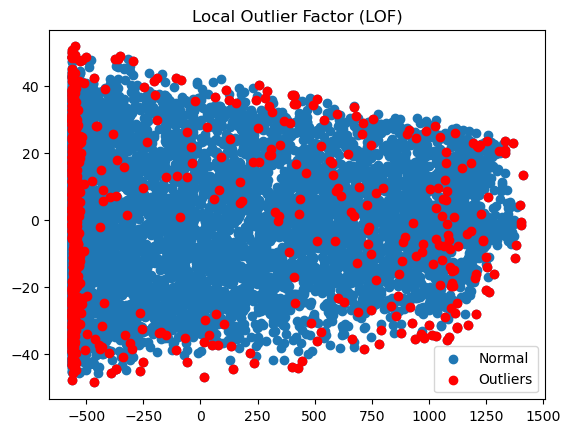

In [27]:
lofs_index = np.where(y_pred!=1)
values = X_pca[lofs_index]
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_pca[:,0], X_pca[:,1], label="Normal")
plt.scatter(values[:,0],values[:,1], color='r', label="Outliers")
plt.legend(loc="lower right")
plt.show()


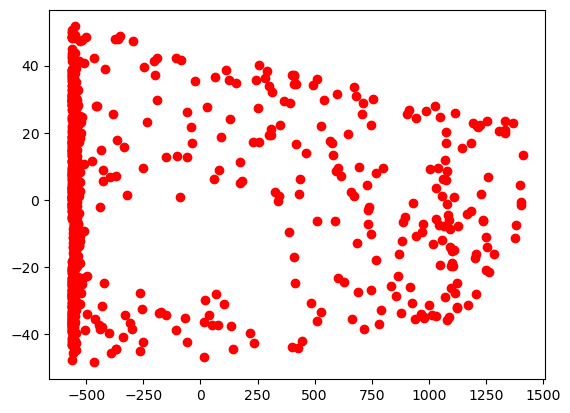

In [28]:
plt.scatter(values[:,0],values[:,1], color='r', label="Outliers")

### contamination = 0.2, metric = minkowski, n_neighbors = 50

In [29]:
model2 = LocalOutlierFactor(n_neighbors = 50, metric="minkowski", contamination = 0.2)

In [30]:
y_pred = model2.fit_predict(X)
n_errors = (y_pred != y).sum()
X_scores = model2.negative_outlier_factor_

In [31]:
df2.columns
to_model_columns=df2.columns

model2.fit(df2[to_model_columns])
pred = model2.fit_predict(df2[to_model_columns])
df2['outliers']=pred
outliers2=df2.loc[df2['outliers']==-1]
outlier_index=list(outliers.index)

print(df2['outliers'].value_counts())

 1    7008
-1    1752
Name: outliers, dtype: int64


In [32]:
outliers2

,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day,outliers
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,3,1,1,-1
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,3,1,1,-1
11,360,11,-0.5,21,1.3,1936,-20.2,0.94,0.0,0.0,3,1,1,-1
19,600,19,0.0,77,1.7,2000,-3.5,0.00,0.0,0.0,3,1,1,-1
20,426,20,-0.3,79,1.5,1913,-3.5,0.00,0.0,0.0,3,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8750,761,14,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,0,1,1,-1
8751,768,15,7.0,20,3.3,1994,-14.4,1.21,0.0,0.0,0,1,1,-1
8752,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,0,1,1,-1
8755,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,0,1,1,-1


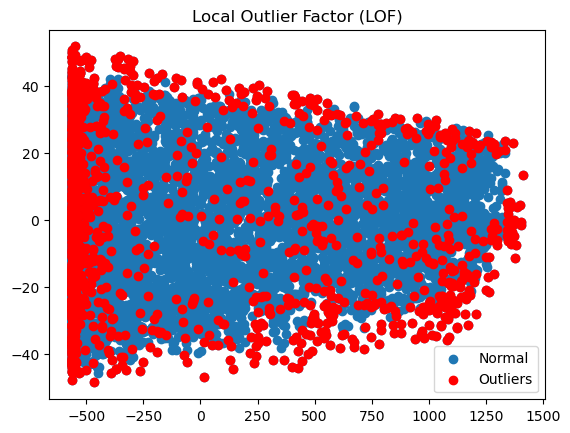

In [33]:
lofs_index = np.where(y_pred!=1)
values = X_pca[lofs_index]
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_pca[:,0], X_pca[:,1], label="Normal")
plt.scatter(values[:,0],values[:,1], color='r', label="Outliers")
plt.legend(loc="lower right")
plt.show()

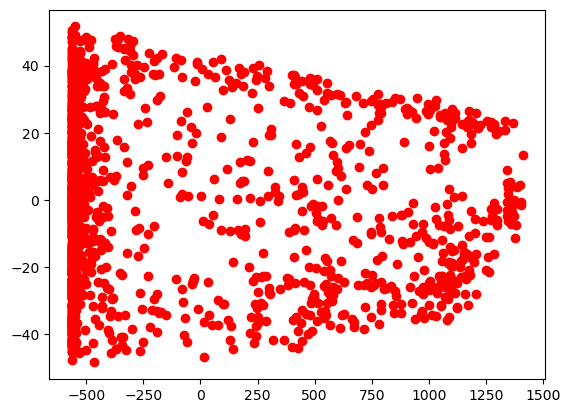

In [34]:
plt.scatter(values[:,0],values[:,1], color='r', label="Outliers")

### contamination = 0.02, metric = manhattan, n_neighbors = 10

In [51]:
model3 = LocalOutlierFactor(n_neighbors = 10, metric="manhattan", contamination = 0.02)

In [36]:
y_pred = model3.fit_predict(X)
n_errors = (y_pred != y).sum()
X_scores = model3.negative_outlier_factor_

In [37]:
df2.columns
to_model_columns=df2.columns

model3.fit(df2[to_model_columns])
pred = model3.fit_predict(df2[to_model_columns])
df2['outliers']=pred
outliers3=df2.loc[df2['outliers']==-1]
outlier_index=list(outliers.index)

print(df2['outliers'].value_counts())

 1    8584
-1     176
Name: outliers, dtype: int64


In [38]:
outliers3

,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day,outliers
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,3,1,1,-1
105,462,9,-7.6,31,1.3,1974,-21.8,0.21,0.0,0.0,3,1,1,-1
138,204,18,1.7,90,1.0,66,0.2,0.00,0.3,0.3,3,1,1,-1
152,754,8,-0.2,96,0.8,173,-0.7,0.01,0.0,0.8,3,1,1,-1
209,481,17,3.5,37,1.8,1963,-9.8,0.10,0.0,0.0,3,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8312,1699,8,3.3,69,0.0,2000,-1.8,0.06,0.0,0.0,0,1,1,-1
8503,934,7,0.5,53,1.1,2000,-7.9,0.00,0.0,0.0,0,1,1,-1
8504,1818,8,0.3,53,0.9,1971,-8.1,0.05,0.0,0.0,0,1,1,-1
8576,1516,8,-3.0,43,1.1,2000,-13.8,0.03,0.0,0.0,0,1,1,-1


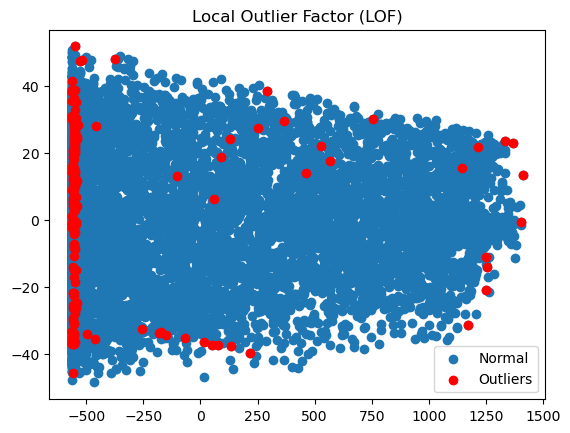

In [39]:
lofs_index = np.where(y_pred!=1)
values = X_pca[lofs_index]
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_pca[:,0], X_pca[:,1], label="Normal")
plt.scatter(values[:,0],values[:,1], color='r', label="Outliers")
plt.legend(loc="lower right")
plt.show()

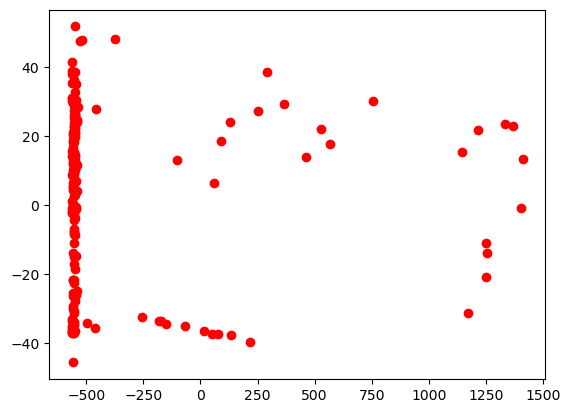

In [40]:
plt.scatter(values[:,0],values[:,1], color='r', label="Outliers")

Local Outlier Factor works depends on the surrounding neighborhood. By comparing the local densities of a sample to the local densities of its neighbors, while it discovers samples with the lower density than their neighbors, then these are the outliers.
We are able to set the portion/segment of the outliers with the amount of contamination. The outliers are 876 rows when we set the contamination = 0.1, while it has 0.2 we get 1752 rows of outliers and 176 outliers when it has 0.02 proportion of contamination.

## Isolation Forest

Contamination is also needed for isolation forest. We can assume the number of outliers by using contamination.

### contamination = 0.1

In [41]:
df1 = df.copy()

model4 = IsolationForest(contamination=0.1, n_estimators=100, max_samples="auto")
model4.fit(df1)


IsolationForest(contamination=0.1)

In [42]:
df1['outliers_score'] = model4.predict(df1[['Rented_bike_count','Hour','Temperature','Humidity',
                                            'Wind_speed','Visibility','Dew_point_temperature',
                                            'Solar_radiation','Rainfall','Snowfall','Seasons','Holiday','Functioning_day']])

df[df1['outliers_score']==-1]

,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day
141,165,21,1.1,92,0.5,235,0.0,0.00,0.7,1.0,3,1,1
142,222,22,1.3,92,0.6,233,0.1,0.00,0.0,1.0,3,1,1
143,193,23,1.3,92,0.6,209,0.1,0.00,0.0,1.0,3,1,1
222,9,6,-0.5,90,0.9,91,-1.9,0.00,2.5,2.7,3,1,1
223,20,7,-0.4,92,1.1,121,-1.5,0.00,0.0,4.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8625,355,9,2.3,88,1.1,286,0.5,0.41,0.0,2.5,0,1,1
8626,430,10,4.0,76,1.3,404,0.1,0.93,0.0,2.4,0,1,1
8627,522,11,6.0,66,0.9,573,0.1,1.37,0.0,2.3,0,1,1
8628,700,12,6.9,59,0.9,669,-0.5,1.31,0.0,2.2,0,1,1


In [43]:
df1['outliers_score'].value_counts()

 1    7884
-1     876
Name: outliers_score, dtype: int64

In [44]:
accuracy = 100*list(df1['outliers_score']).count(-1)/876
print("Accuracy of the model:", accuracy)

Accuracy of the model: 100.0


### contamination = 0.2

In [45]:
model6 = IsolationForest(contamination=0.2, n_estimators=100, max_samples="auto")
model6.fit(df)


IsolationForest(contamination=0.2)

In [46]:
df1['outliers_score'] = model6.predict(df1[['Rented_bike_count','Hour','Temperature','Humidity',
                                            'Wind_speed','Visibility','Dew_point_temperature',
                                            'Solar_radiation','Rainfall','Snowfall','Seasons','Holiday','Functioning_day']])

df[df1['outliers_score']==-1]

,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day
54,13,6,3.4,86,2.5,278,1.2,0.00,1.0,0.0,3,1,1
57,152,9,3.5,91,1.8,231,2.1,0.02,2.5,0.0,3,1,1
71,303,23,3.9,90,1.3,194,2.4,0.00,0.0,0.0,3,1,1
85,391,13,0.0,30,5.4,1938,-15.5,1.17,0.0,0.0,3,1,1
87,341,15,-0.1,25,5.8,2000,-17.8,0.88,0.0,0.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8701,681,13,9.2,13,1.6,1776,-17.8,1.86,0.0,0.0,0,1,1
8702,675,14,10.3,14,1.1,1880,-16.1,1.70,0.0,0.0,0,1,1
8703,798,15,10.5,16,2.7,1509,-14.3,1.29,0.0,0.0,0,1,1
8704,808,16,9.6,17,3.0,1706,-14.3,0.77,0.0,0.0,0,1,1


In [47]:
df1['outliers_score'].value_counts()


 1    7008
-1    1752
Name: outliers_score, dtype: int64

### contamination = 0.02

In [48]:
df1 = df.copy()

model5 = IsolationForest(contamination=0.02, n_estimators=100, max_samples="auto")
model5.fit(df1)

IsolationForest(contamination=0.02)

In [49]:
df1['outliers_score'] = model5.predict(df1[['Rented_bike_count','Hour','Temperature','Humidity',
                                            'Wind_speed','Visibility','Dew_point_temperature',
                                            'Solar_radiation','Rainfall','Snowfall','Seasons','Holiday','Functioning_day']])

df[df1['outliers_score']==-1]

,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day
222,9,6,-0.5,90,0.9,91,-1.9,0.00,2.5,2.7,3,1,1
225,31,9,0.2,90,1.0,305,-1.2,0.00,1.6,4.3,3,1,1
226,19,10,0.5,91,0.4,143,-0.8,0.00,0.0,4.3,3,1,1
417,52,9,-4.3,89,1.0,59,-5.8,0.00,1.6,4.0,3,1,1
420,62,12,-1.8,83,1.2,351,-4.3,0.09,1.1,5.1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8232,0,0,12.0,96,3.1,1185,11.3,0.00,18.0,0.0,0,1,0
8245,0,13,14.0,46,5.3,927,2.5,1.68,0.0,0.0,0,1,0
8600,33,8,0.4,96,3.1,33,-0.1,0.00,0.0,4.0,0,1,1
8601,24,9,0.3,97,3.0,34,-0.1,0.00,9.1,7.1,0,1,1


In [50]:
df1['outliers_score'].value_counts()

 1    8584
-1     176
Name: outliers_score, dtype: int64

The isolation forest method selects the value by spliting depends on the amount of contamination of data set. We can see the amout of outliers are 876 rows when we set the contamination = 0.1, 1752 rows of outliers when it has 0.2, and 176 outliers when it has 0.02 proportion of contamination.


## Conclusion

- IQR Method and Boxplot are the simpliest way to find outlier, however boxplot only can depicts the distribution, not for detailed amount of outliers. Thus, we can use IQR method along boxplot in order to get detailed outlier values and the visualization. 

- LOF method and Isolation Forest method set the amount of outliers using the proportion of contamination. 

- LOF algorithm identifies the outliers effectively. It works based on the local neighborhood. However, since it is ratio, it will be difficult to interpret. LOF also does not have threshold value to define outliers.

- Isolation Forest algorithm are computationally efficient and effective in outlier detection. Since the proportion of outliers depends on the contamination, we should have an idea of what percentage of the unusual data beforehand to get a better prediction. Isolation Forest also does not have threshold value to define outliers.